# Pre-Requisit

## Installs

In [18]:
%pip install keras
%pip install tensorflow
%pip install matplotlib
%pip install scikit-learn
%pip install pillow
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Exception ignored in: <function _releaseLock at 0x105bd2d40>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 237, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports


In [191]:
import os
import keras
import random
import shutil
import numpy as np
import seaborn as sns
import tensorflow as tf

from os import path
from keras import layers
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, RandomBrightness, RandomRotation, RandomZoom, RandomContrast
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


## Loading the data

In [192]:
all_labels = ['NORMAL', 'PNEUMONIA']
# TODO: change it
base_dir = "/Users/neriya.shulman/content/chest_xray"
img_size = 150


In [215]:
def load_data(base_dir, img_size, all_labels):
    dataset = []
    labels = []
    file_names = []
    for dir_ in os.scandir(base_dir):
        if not dir_.is_dir():
            continue
        label = all_labels.index(dir_.name)
        for file in os.scandir(dir_.path):
            if file.name == '.DS_Store':
                continue
            img = load_img(file.path, target_size=(img_size, img_size), color_mode='grayscale')
            arr_img = img_to_array(img)
            dataset.append(arr_img)
            labels.append(label) # change label to 0 or 1
            file_names.append(file.name)
    dataset = np.array(dataset, dtype='float32')
    labels = np.expand_dims(labels, -1)
    file_names = np.expand_dims(file_names, -1)
    return dataset, labels, file_names

In [216]:
# from utils import load_data, add_samples_to_validation, shuffle_dataset
# add_samples_to_validation(base_dir)

In [217]:
orig_train_set, orig_train_labels, train_file_names = load_data(path.join(base_dir, "train"), img_size, all_labels)
orig_validation_set, orig_validation_labels, _ = load_data(path.join(base_dir, "val"), img_size, all_labels)
test_set, test_labels, _ = load_data(path.join(base_dir, "test"), img_size, all_labels)

In [218]:
print(orig_train_set.shape)
print(orig_train_labels.shape)
print(orig_validation_set.shape)
print(orig_validation_labels.shape)
print(test_set.shape)
print(test_labels.shape)
print(train_file_names.shape)

'''
(7098, 150, 150, 1)
(7098, 1)
(16, 150, 150, 1)
(16, 1)
(624, 150, 150, 1)
(624, 1)
'''

(4816, 150, 150, 1)
(4816, 1)
(416, 150, 150, 1)
(416, 1)
(624, 150, 150, 1)
(624, 1)
(4816, 1)


'\n(7098, 150, 150, 1)\n(7098, 1)\n(16, 150, 150, 1)\n(16, 1)\n(624, 150, 150, 1)\n(624, 1)\n'

Increase validation set

In [219]:
train_set = orig_train_set
train_labels = orig_train_labels
validation_set = orig_validation_set
validation_labels = orig_validation_labels

In [220]:
# print('validation set size before moving from the train: ', len(orig_validation_set))

# num_to_move = 200
# normal_indexes = [i for i, label in enumerate(orig_train_labels.reshape(-1)) if label == 0]
# bacteria_indexes = [i for i, file in enumerate(train_file_names.reshape(-1)) if 'bacteria' in file]
# virus_indexes = [i for i, file in enumerate(train_file_names.reshape(-1)) if 'virus' in file]

# new_indexes = np.concatenate((normal_indexes[:num_to_move], bacteria_indexes[:num_to_move//2], virus_indexes[:num_to_move//2]), axis=0)

# validation_set = np.concatenate((orig_validation_set, orig_train_set[new_indexes]), axis=0)
# validation_labels = np.concatenate((orig_validation_labels, orig_train_labels[new_indexes]), axis=0)

# train_set = np.delete(orig_train_set, new_indexes, axis=0)
# train_labels = np.delete(orig_train_labels, new_indexes, axis=0)

# print('validation set size after moving: ', len(validation_set))


In [221]:
# # Get the indices where c is equal to 1 and 2
# normal_indices = np.where(train_labels.reshape(-1) == 0)[0][:100]
# bacteria_indices = np.where(c.reshape(-1) == 2)[0][:50]
# virus_indexes_indices = np.where(c.reshape(-1) == 2)[0][:50]
# indices = np.concatenate((indices_1, indices_2))

# # Determine the number of elements to append
# n_elements_to_append = len(indices)

# # Expand the shape of b to accommodate new elements
# b = np.concatenate((b, np.zeros((n_elements_to_append, 150, 150, 1))), axis=0)

# # Append elements from a to b based on indices
# b[16:16+n_elements_to_append] = a[indices]

# # Remove elements from a based on indices
# a = np.delete(a, indices, axis=0)

# print("Array a shape:", a.shape)
# print("Array b shape:", b.shape)
# print("Array c shape:", c.shape)

In [222]:


print(validation_set.shape)
print(validation_labels.shape)
print(train_set.shape)
print(train_labels.shape)


(400,)
(416, 150, 150, 1)
(416, 1)
(4816, 150, 150, 1)
(4816, 1)


Balance the training data

Number of images in training set:  4816
Number of Normal images:  1141
Number of Pneumonia images:  3675
Ratio of train: 0.24


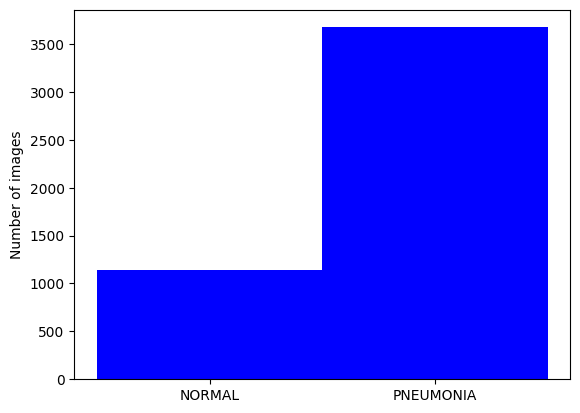

In [223]:
normal_train_data = train_set[train_labels[:, 0] == 0] 
pneum_train_data = train_set[train_labels[:, 0] == 1]

print('Number of images in training set: ', len(train_set))
print('Number of Normal images: ', len(normal_train_data))
print('Number of Pneumonia images: ', len(pneum_train_data))
print(f'Ratio of train: {len(normal_train_data)/len(train_set):.2}')

plt.hist(train_labels, bins=2, color='blue')
plt.ylabel('Number of images')
plt.xticks([0.25, 0.75], ['NORMAL', 'PNEUMONIA'])
plt.show()

Balance the data by multiplying the normal images

In [234]:
multiply_by = round(len(pneum_train_data) / len(normal_train_data))
normal_train_data = np.concatenate([normal_train_data for _ in range(multiply_by)], axis=0)
normal_train_labels = np.full((len(normal_train_data), 1), all_labels.index('NORMAL'))
pneum_train_labels = np.full((len(pneum_train_data), 1), all_labels.index('PNEUMONIA'))

train_set = np.concatenate([normal_train_data, pneum_train_data], axis=0)
train_labels = np.concatenate([normal_train_labels, pneum_train_labels], axis=0)



KeyboardInterrupt: 

Number of Normal images:  3423
Number of Pneumonia images:  3675
Ratio of data: 48:52


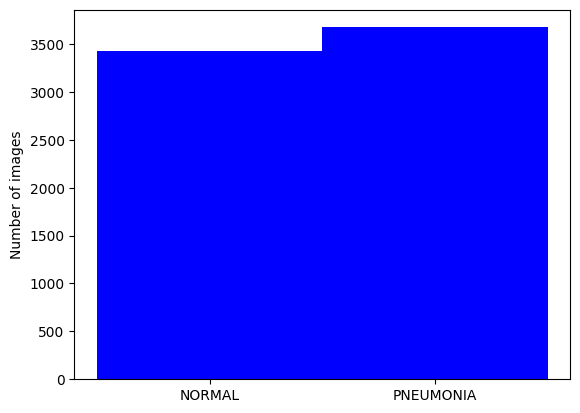

In [225]:
print('Number of Normal images: ', len(normal_train_data))
print('Number of Pneumonia images: ', len(pneum_train_data))
print(f'Ratio of data: {round(len(normal_train_data)/len(train_set)*100)}:{round(len(pneum_train_data)/len(train_set)*100)}')
plt.hist(train_labels.squeeze(), bins=2, color='blue')
plt.ylabel('Number of images')
plt.xticks([0.25, 0.75], ['NORMAL', 'PNEUMONIA'])
plt.show()

Shuffling

In [226]:
def shuffle_dataset(dataset, labels):
    indices = np.arange(dataset.shape[0])
    np.random.shuffle(indices)
    return dataset[indices], labels[indices]

train_set, train_labels = shuffle_dataset(train_set, train_labels)

Normalization

In [227]:
train_set /= 255

## The model

In [228]:
max_epochs = 50
batch_size = 64
learning_rate=0.001

In [229]:


model = keras.Sequential(
    [
        keras.Input(shape=(img_size, img_size, 1)),
        RandomRotation(0.35),
        RandomZoom(0.1),
        RandomBrightness(0.15, value_range=(0,1)),
        RandomContrast(0.1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name='flatten'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        layers.Dropout(0.5),
        Dense(units=32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(units=1, activation='sigmoid'),
    ]
)

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate), metrics=["accuracy", "recall", "precision"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(train_set, train_labels, epochs=max_epochs, batch_size=batch_size, shuffle=True,
        validation_data=(validation_set, validation_labels), callbacks=[early_stopping])


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5575 - loss: 0.6972 - precision: 0.5910 - recall: 0.4503 - val_accuracy: 0.5000 - val_loss: 171.3203 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8319 - loss: 0.4046 - precision: 0.8537 - recall: 0.8193 - val_accuracy: 0.5072 - val_loss: 169.1656 - val_precision: 1.0000 - val_recall: 0.0144
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8364 - loss: 0.3830 - precision: 0.8775 - recall: 0.7975 - val_accuracy: 0.5553 - val_loss: 132.3359 - val_precision: 1.0000 - val_recall: 0.1106
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8839 - loss: 0.2977 - precision: 0.9082 - recall: 0.8694 - val_accuracy: 0.5409 - val_loss: 177.7490 - val_precision: 1.0000 - val_recall: 0.0817
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8949 - loss: 0.2795 - precision: 0.9239 - recall: 0.8637 - val_accuracy: 

In [230]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation_4               │ (None, 150, 150, 1)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_4 (RandomZoom)      │ (None, 150, 150, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness_4             │ (None, 150, 150, 1)    │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_4               │ (None, 150, 150, 1)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,938,437 (121.84 MB)

 Trainable params: 10,646,145 (40.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,292,292 (81.22 MB)

None


Show the metrics of the model

In [231]:
score = model.evaluate(test_set, test_labels, batch_size=batch_size)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test recall:", score[2])
print("Test precision:", score[3])


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2805 - loss: 328.7484 - precision: 1.0000 - recall: 0.1700
Test loss: 239.769287109375
Test accuracy: 0.47275641560554504
Test recall: 0.15641026198863983
Test precision: 1.0


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2805 - loss: 328.7484 - precision: 1.0000 - recall: 0.1700
Test loss: 239.769287109375
Test accuracy: 0.47275641560554504
Test recall: 0.15641026198863983
Test precision: 1.0


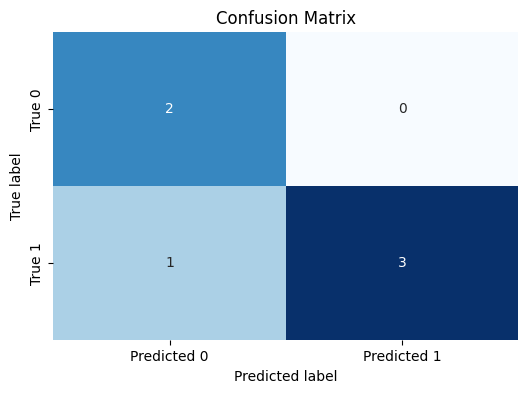

In [232]:
score = model.evaluate(test_set, test_labels, batch_size=batch_size)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test recall:", score[2])
print("Test precision:", score[3])




# Assuming y_true and y_pred are your true and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1])

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [233]:
print(predicted_result.shape)
print(test_labels.shape)

NameError: name 'predicted_result' is not defined

save the model

In [ ]:
model.save('model_q1_a.keras')